In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import csv
import json
import ipywidgets as widgets
# Import API key
from api_keys import g_key
# Access maps with unique API key
gmaps.configure(api_key=g_key)

In [2]:
csvpath1 = os.path.join('.', 'input_data', 'beers_global.csv')
csvpath2 = os.path.join('.', 'input_data', 'breweries_global.csv')

df_beer = pd.read_csv(csvpath1)
df_brew = pd.read_csv(csvpath2)

print(df_beer.head())
print(df_brew.head())

       id                                  name  brewery_id state country  \
0  202522                        Olde Cogitator        2199    CA      US   
1   82352  Konrads Stout Russian Imperial Stout       18604   NaN      NO   
2  214879                        Scottish Right       44306    IN      US   
3  320009               MegaMeow Imperial Stout        4378    WA      US   
4  246438                       Peaches-N-Cream       44617    PA      US   

                     style availability   abv                   notes retired  
0    English Oatmeal Stout     Rotating   7.3  No notes at this time.       f  
1   Russian Imperial Stout     Rotating  10.4  No notes at this time.       f  
2             Scottish Ale   Year-round   4.0  No notes at this time.       t  
3  American Imperial Stout       Winter   8.7    Every time this year       f  
4       American Cream Ale     Rotating   5.1  No notes at this time.       f  
      id                                  name           

In [3]:
# Replace NaN values with 0
df_beer['abv']=df_beer['abv'].fillna(value=0)

# Make ABV a percentage for readability in the plots
df_beer['abv'] = df_beer['abv']*100

df_brew['brewery_id'] = df_brew['id']

df = df_beer.merge(df_brew, on="brewery_id")
print(df.shape)
print(df.info())
df

(358873, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 358873 entries, 0 to 358872
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id_x          358873 non-null  int64  
 1   name_x        358873 non-null  object 
 2   brewery_id    358873 non-null  int64  
 3   state_x       298147 non-null  object 
 4   country_x     358719 non-null  object 
 5   style         358872 non-null  object 
 6   availability  358873 non-null  object 
 7   abv           358873 non-null  float64
 8   notes_x       358827 non-null  object 
 9   retired       358873 non-null  object 
 10  id_y          358873 non-null  int64  
 11  name_y        358873 non-null  object 
 12  city          355839 non-null  object 
 13  state_y       298281 non-null  object 
 14  country_y     358853 non-null  object 
 15  notes_y       358340 non-null  object 
 16  types         358873 non-null  object 
dtypes: float64(1), int64(3), object(13)

,id_x,name_x,brewery_id,state_x,country_x,style,availability,abv,notes_x,retired,id_y,name_y,city,state_y,country_y,notes_y,types
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,730.0,No notes at this time.,f,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
1,8677,Red Leaf Strong Ale,2199,CA,US,American Strong Ale,Year-round,860.0,No notes at this time.,f,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
2,8129,Hefeweisen,2199,CA,US,German Hefeweizen,Year-round,0.0,No notes at this time.,t,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
3,202536,Bikini Bottom,2199,CA,US,American Lager,Rotating,490.0,No notes at this time.,f,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
4,33121,Fog Lifter IPA,2199,CA,US,American IPA,Rotating,0.0,No notes at this time.,t,2199,Main Street Brewery,Pleasanton,CA,US,No notes at this time.,"Brewery, Bar, Eatery"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358868,167034,Vals Paterke,40028,NaN,BE,Belgian Strong Pale Ale,Year-round,830.0,No notes at this time.,f,40028,Brouwerij 't Drankorgel,Mol,NaN,BE,No notes at this time.,"Brewery, Beer-to-go"
358869,214214,Crus - Sacra Birra,44211,NaN,IT,Belgian Dubbel,Rotating,700.0,No notes at this time.,f,44211,Birrificio Artigianale Opera,Pavia,NaN,IT,No notes at this time.,Brewery
358870,200378,Caudillo India Pale Ale,43193,NaN,CL,English India Pale Ale (IPA),Year-round,830.0,No notes at this time.,f,43193,Cerveza Caudillo,Santiago,NaN,CL,No notes at this time.,Brewery
358871,289252,Hellegat Blond,49596,NaN,BE,Belgian Blonde Ale,Year-round,650.0,No notes at this time.,f,49596,Brouwerij De Klem,Niel,NaN,BE,No notes at this time.,"Brewery, Bar"


In [4]:
# Name is repeated name, its beer name and brewery name from the respective CSV files
df = df.rename(index=str, columns={"id_x": "beer_id",
                                    "name_x":"beer_name", "name_y":"brewery_name", 
                                   "notes_x":"beer_notes", "notes_y":"brewery_notes", 
                                   "state_x":"state", "country_x":"country"})

# Drop duplicate columns
df = df.drop(['id_y','state_y','country_y'], axis=1)

print(f"{len(df)}, {len(df.columns)}")
df.head()

358873, 14


,beer_id,beer_name,brewery_id,state,country,style,availability,abv,beer_notes,retired,brewery_name,city,brewery_notes,types
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,730.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
1,8677,Red Leaf Strong Ale,2199,CA,US,American Strong Ale,Year-round,860.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
2,8129,Hefeweisen,2199,CA,US,German Hefeweizen,Year-round,0.0,No notes at this time.,t,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
3,202536,Bikini Bottom,2199,CA,US,American Lager,Rotating,490.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
4,33121,Fog Lifter IPA,2199,CA,US,American IPA,Rotating,0.0,No notes at this time.,t,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"


In [5]:
# Observation - dataframe has some places may not be a brewery but bar or eatery only. 
# Filter down by looking for key "Brewery" in types column
df[df['types'].str.contains('Brewery')]
df.head()

,beer_id,beer_name,brewery_id,state,country,style,availability,abv,beer_notes,retired,brewery_name,city,brewery_notes,types
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,730.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
1,8677,Red Leaf Strong Ale,2199,CA,US,American Strong Ale,Year-round,860.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
2,8129,Hefeweisen,2199,CA,US,German Hefeweizen,Year-round,0.0,No notes at this time.,t,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
3,202536,Bikini Bottom,2199,CA,US,American Lager,Rotating,490.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
4,33121,Fog Lifter IPA,2199,CA,US,American IPA,Rotating,0.0,No notes at this time.,t,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"


In [6]:
country_list = df_brew['country'].unique()
print(country_list)
countries_breweries=df_brew.groupby(['country']).count()
countries_breweries_top=countries_breweries.sort_values(by='name', axis=0, ascending=False)
countries_breweries_top.head()

['BE' 'US' 'GB' 'AU' 'IT' 'CA' 'GR' 'FR' 'AT' 'ES' 'RU' 'SE' 'NL' 'UZ'
 'CO' 'JP' 'PL' 'CZ' 'DE' 'PT' 'DK' 'TW' 'AR' 'NZ' 'CH' 'BR' 'MX' 'VN'
 'FI' 'EE' 'PR' 'UA' 'IM' 'SM' 'CL' 'BZ' 'AL' 'SK' 'IE' 'CN' 'KY' 'PW'
 'NO' 'RO' 'MM' 'SG' 'LT' 'RS' 'BM' 'KH' 'LV' 'HK' 'CY' 'MD' 'IS' 'PH'
 'IN' 'PE' 'UY' 'TR' 'TH' 'IR' 'JM' 'EC' 'ZA' 'KR' 'BG' 'IL' 'LI' 'HU'
 'NG' 'CR' 'VI' 'PS' 'KP' 'MY' 'KG' 'GT' 'CG' 'KE' 'MK' 'FO' 'AE' 'TD'
 'WS' 'JE' 'LA' 'BB' 'TO' 'MN' 'ER' 'DO' 'VU' 'MG' 'GE' 'VE' 'BY' 'SI'
 'CK' 'SV' 'MU' 'ID' 'BH' 'VC' 'SR' 'NE' 'MZ' 'LU' 'RW' 'UG' 'MT' 'HR'
 'GG' 'NC' 'ME' 'PA' 'PF' 'BA' 'TM' 'SN' 'DZ' 'ET' 'AO' 'GH' 'NP' 'MA'
 'BS' 'BT' 'OM' 'KZ' 'CW' 'CU' 'AG' nan 'BF' 'GF' 'AZ' 'HT' 'GL' 'LB' 'DM'
 'HN' 'VG' 'CI' 'GP' 'TC' 'NI' 'BO' 'AM' 'SX' 'GI' 'RE' 'LK' 'GU' 'ST'
 'TZ' 'FJ' 'AW' 'ZW' 'BW' 'LC' 'TN' 'EG' 'SZ' 'TT' 'SB' 'CM' 'LS' 'MO'
 'JO' 'SC' 'MQ' 'AD' 'LY' 'CV' 'TJ' 'ML' 'PG' 'SS' 'PK' 'SY' 'YT' 'GD'
 'AF' 'CF' 'GM' 'MC' 'IQ' 'GQ' 'PY' 'BJ' 'GW' 'BD' 'LR' 'GN' 'TG' 'FM'
 '

,id,name,city,state,notes,types,brewery_id
country,,,,,,,
US,34693,34693,34659,34660,34660,34693,34693
GB,2525,2525,2525,2525,2523,2525,2525
CA,1890,1890,1890,1890,1886,1890,1890
DE,1812,1812,1812,0,1804,1812,1812
BE,756,756,754,0,751,756,756


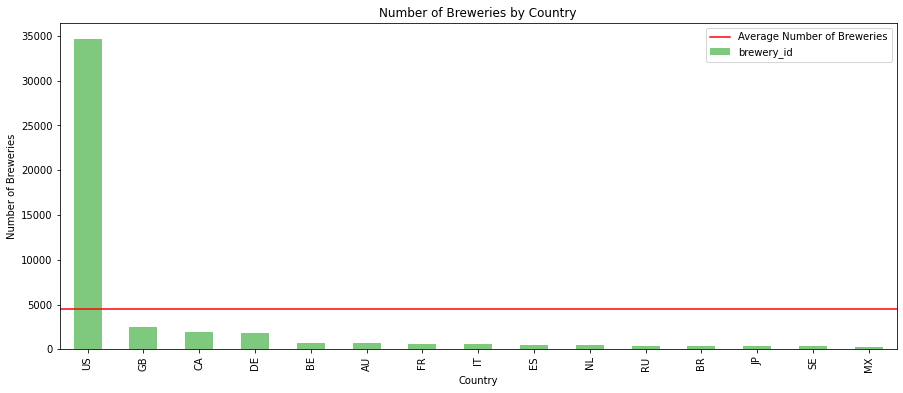

In [7]:
plot = countries_breweries_top['brewery_id'].nlargest(15).plot(kind='bar', title="Number of Breweries by Country", 
                             figsize=(15,6), colormap='Accent')
plot.set_xlabel('Country')
plot.set_ylabel('Number of Breweries')
mean_line = plot.axhline(df.state.value_counts().mean(), color='r', label='Average Number of Breweries')
plt.legend()

In [8]:
def get_data_by_country(df, target_country):
    country_df = df.loc[df['country']== target_country]
    #print(target_country, country_df.head())
    total_breweries = country_df['brewery_name'].unique().size
    print("Total Breweries in " + country_name +": " + str(total_breweries) +"\n")
    return country_df

def get_data_by_topbeerstyles(country_df):
    beer_style=country_df.groupby(['style']).count()
    beer_style_top=beer_style.sort_values(by='beer_id', axis=0, ascending=False)
    return beer_style_top

def plot_top15_beerstyles(beer_style_top, country_name):
    plot3 = beer_style_top['beer_name'].nlargest(15).plot(kind='bar', 
               title=f'Most Brewed Beer Styles in {country_name}', figsize=(15,6),
               colormap='Pastel2',  )
    mean_line3 = plot3.axhline(beer_style_top.count().nlargest(15).mean(), 
                           color='r', label='Average Number of Different Beers')
    plot3.set_ylabel('Number of Different Beers')
    plt.legend()

In [12]:
w1 = widgets.Dropdown(
    options=country_list,
    value='BE',
    description='Type:',
    disabled=False,
)
display(w1)
country_name = w1.value

Dropdown(description='Type:', options=('BE', 'US', 'GB', 'AU', 'IT', 'CA', 'GR', 'FR', 'AT', 'ES', 'RU', 'SE',…

In [13]:
country_name = w1.value
#print(country_name)
country_df = get_data_by_country(df, country_name)
#country_df.info()
beer_style_top = get_data_by_topbeerstyles(country_df)
beer_style_top.head()

Total Breweries in US: 7693



,beer_id,beer_name,brewery_id,state,country,availability,abv,beer_notes,retired,brewery_name,city,brewery_notes,types
style,,,,,,,,,,,,,
American IPA,37240,37240,37240,36887,37240,37240,37240,37236,37240,37240,36887,37196,37240
American Pale Ale (APA),17017,17017,17017,16867,17017,17017,17017,17015,17017,17017,16867,16992,17017
American Imperial IPA,15965,15965,15965,15869,15965,15965,15965,15963,15965,15965,15869,15955,15965
Belgian Saison,14653,14653,14653,14571,14653,14653,14653,14650,14653,14653,14571,14640,14653
American Wild Ale,11140,11140,11140,11105,11140,11140,11140,11137,11140,11140,11105,11129,11140


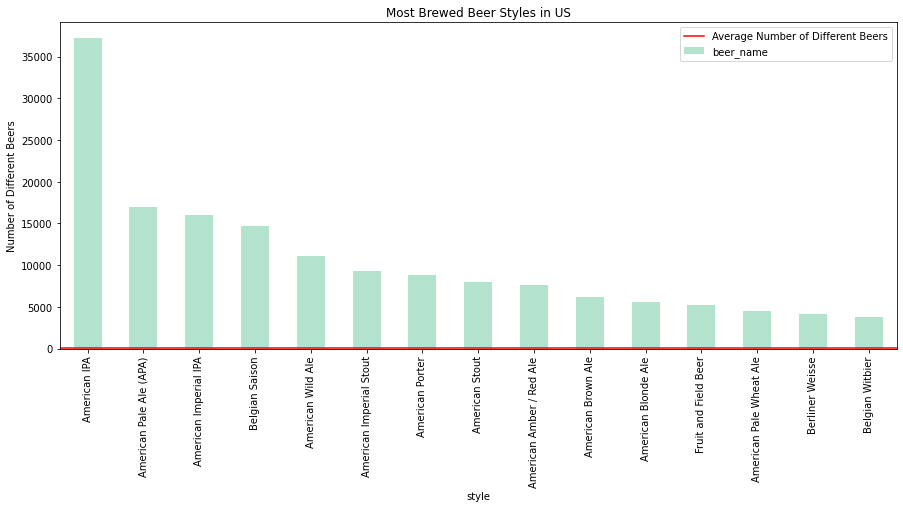

In [14]:
plot_top15_beerstyles(beer_style_top, country_name)

In [15]:
beer_name = input("Search for a beer name: ")

Search for a beer name: 


In [16]:
keyword_df = df[df['beer_name'].str.contains(beer_name, na=False, case=False)]
keyword_df

,beer_id,beer_name,brewery_id,state,country,style,availability,abv,beer_notes,retired,brewery_name,city,brewery_notes,types
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,730.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
1,8677,Red Leaf Strong Ale,2199,CA,US,American Strong Ale,Year-round,860.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
2,8129,Hefeweisen,2199,CA,US,German Hefeweizen,Year-round,0.0,No notes at this time.,t,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
3,202536,Bikini Bottom,2199,CA,US,American Lager,Rotating,490.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
4,33121,Fog Lifter IPA,2199,CA,US,American IPA,Rotating,0.0,No notes at this time.,t,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358868,167034,Vals Paterke,40028,NaN,BE,Belgian Strong Pale Ale,Year-round,830.0,No notes at this time.,f,Brouwerij 't Drankorgel,Mol,No notes at this time.,"Brewery, Beer-to-go"
358869,214214,Crus - Sacra Birra,44211,NaN,IT,Belgian Dubbel,Rotating,700.0,No notes at this time.,f,Birrificio Artigianale Opera,Pavia,No notes at this time.,Brewery
358870,200378,Caudillo India Pale Ale,43193,NaN,CL,English India Pale Ale (IPA),Year-round,830.0,No notes at this time.,f,Cerveza Caudillo,Santiago,No notes at this time.,Brewery
358871,289252,Hellegat Blond,49596,NaN,BE,Belgian Blonde Ale,Year-round,650.0,No notes at this time.,f,Brouwerij De Klem,Niel,No notes at this time.,"Brewery, Bar"


In [17]:
brewery_name = input("Search for a brewery name: ")

Search for a brewery name: 


In [18]:
keyword_df = df[df['brewery_name'].str.contains(brewery_name, na=False, case=False)]
keyword_df

,beer_id,beer_name,brewery_id,state,country,style,availability,abv,beer_notes,retired,brewery_name,city,brewery_notes,types
0,202522,Olde Cogitator,2199,CA,US,English Oatmeal Stout,Rotating,730.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
1,8677,Red Leaf Strong Ale,2199,CA,US,American Strong Ale,Year-round,860.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
2,8129,Hefeweisen,2199,CA,US,German Hefeweizen,Year-round,0.0,No notes at this time.,t,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
3,202536,Bikini Bottom,2199,CA,US,American Lager,Rotating,490.0,No notes at this time.,f,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
4,33121,Fog Lifter IPA,2199,CA,US,American IPA,Rotating,0.0,No notes at this time.,t,Main Street Brewery,Pleasanton,No notes at this time.,"Brewery, Bar, Eatery"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358868,167034,Vals Paterke,40028,NaN,BE,Belgian Strong Pale Ale,Year-round,830.0,No notes at this time.,f,Brouwerij 't Drankorgel,Mol,No notes at this time.,"Brewery, Beer-to-go"
358869,214214,Crus - Sacra Birra,44211,NaN,IT,Belgian Dubbel,Rotating,700.0,No notes at this time.,f,Birrificio Artigianale Opera,Pavia,No notes at this time.,Brewery
358870,200378,Caudillo India Pale Ale,43193,NaN,CL,English India Pale Ale (IPA),Year-round,830.0,No notes at this time.,f,Cerveza Caudillo,Santiago,No notes at this time.,Brewery
358871,289252,Hellegat Blond,49596,NaN,BE,Belgian Blonde Ale,Year-round,650.0,No notes at this time.,f,Brouwerij De Klem,Niel,No notes at this time.,"Brewery, Bar"


In [20]:
print("SEARCH BY REGION")
city = input("Search for breweries by city name: ")

SEARCH BY REGION
Search for breweries by city name: phoenix


In [21]:
keyword_df = df[df['city'].str.contains(city, na=False, case=False)]
keyword_df

,beer_id,beer_name,brewery_id,state,country,style,availability,abv,beer_notes,retired,brewery_name,city,brewery_notes,types
9357,307145,Table Weiss,41121,AZ,US,German Kristalweizen,Rotating,460.0,No notes at this time.,f,Wren House Brewing Co,Phoenix,No notes at this time.,"Brewery, Bar, Beer-to-go"
9358,251908,Apricot Weisse,41121,AZ,US,Berliner Weisse,Limited (brewed once),350.0,No notes at this time.,t,Wren House Brewing Co,Phoenix,No notes at this time.,"Brewery, Bar, Beer-to-go"
9359,242923,Peaches + Cream Wrenovation,41121,AZ,US,American IPA,Rotating,550.0,No notes at this time.,f,Wren House Brewing Co,Phoenix,No notes at this time.,"Brewery, Bar, Beer-to-go"
9360,178984,Jolene,41121,AZ,US,American Pale Ale (APA),Summer,0.0,Brewed with ginger,f,Wren House Brewing Co,Phoenix,No notes at this time.,"Brewery, Bar, Beer-to-go"
9361,338874,No Pale Ales,41121,AZ,US,American IPA,Rotating,500.0,Session IPA hopped with Centennial and Mosaic.,f,Wren House Brewing Co,Phoenix,No notes at this time.,"Brewery, Bar, Beer-to-go"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348878,51515,Old World Dark Knight Porter,19516,AZ,US,English Porter,Year-round,680.0,No notes at this time.,t,Old World Brewery,Phoenix,No notes at this time.,"Brewery, Bar, Beer-to-go"
348879,120689,Old World Hoppy Blonde,19516,AZ,US,American Blonde Ale,Rotating,450.0,No notes at this time.,t,Old World Brewery,Phoenix,No notes at this time.,"Brewery, Bar, Beer-to-go"
348880,48491,Old World Wit,19516,AZ,US,Belgian Witbier,Year-round,600.0,Wit is identification for Belgium Wheat beer. ...,t,Old World Brewery,Phoenix,No notes at this time.,"Brewery, Bar, Beer-to-go"
348881,62908,Old World Nitro Blonde,19516,AZ,US,American Blonde Ale,Year-round,420.0,"Our golden ale that is clear, crisp, and dry, ...",t,Old World Brewery,Phoenix,No notes at this time.,"Brewery, Bar, Beer-to-go"
